In [1]:
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Emilie Berger\Downloads\sp500sub.csv", index_col='Date', parse_dates=True)
df.head()

Open   High    Low  Close  Adj Close     Volume  Name
Date                                                              
2010-01-04   9.22   9.51   9.17   9.50       9.50  1865400.0  INCY
2010-01-05   9.51  10.29   9.45  10.27      10.27  7608900.0  INCY
2010-01-06  10.38  11.09  10.35  11.00      11.00  8046700.0  INCY
2010-01-07  11.00  11.06  10.62  10.82      10.82  3680300.0  INCY
2010-01-08  10.82  11.00  10.75  10.94      10.94  1529300.0  INCY

In [3]:
# Google
goog = df[df['Name'] == 'GOOG']['Close']
# goog = np.log(df[df['Name'] == 'GOOG']['Close'])

<AxesSubplot:xlabel='Date'>

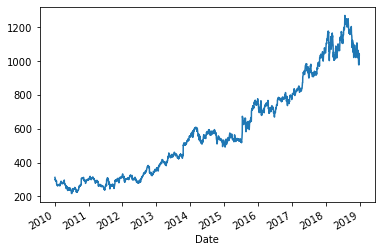

In [4]:
goog.plot()

In [5]:
# 30 days

Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [6]:
model = pm.auto_arima(train,
                     error_action='ignore', trace=True,
                     suppress_warnings=True, maxiter=10,
                     seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16270.771, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16268.077, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.935, Time=0.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16268.277, Time=0.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.42 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16264.983, Time=0.40 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=16266.925, Time=0.45 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16268.907, Time=0.66 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=16265.470, Time=0.16 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 4.519 seconds


In [7]:
model.summary()

# best model found ARIMA(3, 1, 0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8127.491
Date:                Mon, 14 Aug 2023   AIC                          16264.983
Time:                        17:36:44   BIC                          16293.536
Sample:                             0   HQIC                         16275.409
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3104      0.198      1.571      0.116      -0.077       0.698
ar.L1          0.0378      0.012      3.152      0.002       0.014       0.061
ar.L2         -0.0410      0.013     -3.241      0.001      -0.066      -0.016
ar.L3          0.0488      0.012      4.031      0.000       0.025       0.073
sigma2        85.1623      1.033     82.421      0.000      83.137      87.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11790.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.78   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (3, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


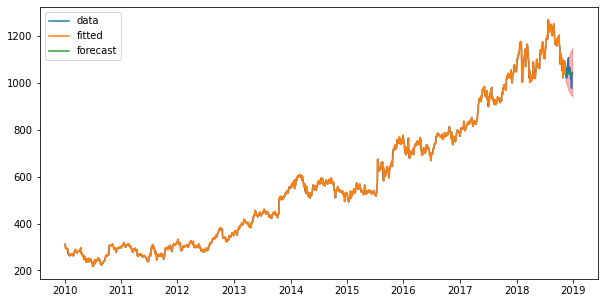

In [9]:
def plot_result(model, fulldata, train, test):
    params = model.get_params()
    d = params['order'][1]
    
    train_pred = model.predict_in_sample(start=d, end=-1)
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(fulldata.index, fulldata, label='data')
    ax.plot(train.index[d:], train_pred, label='fitted')
    ax.plot(test.index, test_pred, label='forecast')
    ax.fill_between(test.index, \
                   confint[:, 0], confint[:, 1], \
                   color='red', alpha=0.3)
    ax.legend()

plot_result(model, goog, train, test)

# looks pretty good but too small to see

C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


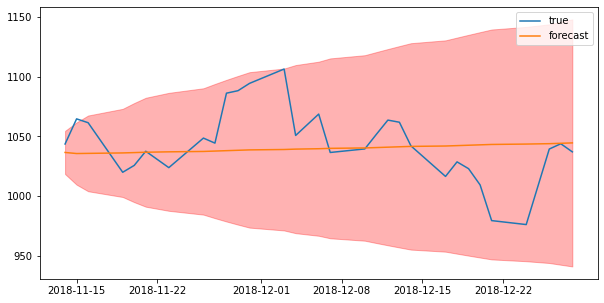

In [10]:
def plot_test(model, test):
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(test.index, test, label='true')
    ax.plot(test.index, test_pred, label='forecast')
    ax.fill_between(test.index, \
                   confint[:, 0], confint[:, 1], \
                   color='red', alpha=0.3)
    ax.legend()
    
plot_test(model, test)

# forecast not that good after all
# seems to capture average well 

In [22]:
def rmse(y, t):
    return np.sqrt(np.mean((t - y)**2))

print("RMSE ARIMA:", rmse(model.predict(Ntest), test)) # result should be 30.4366
print("RMSE Naive:", rmse(train.iloc[-1], test)) # can simply be a single value, 
# final value of train series,
# series and numpy arrays broadcast during substracions (ex: can subtract scalar from an array and vice-versa)

# Naive Forecast wins

RMSE ARIMA: nan
RMSE Naive: 30.029502477261467


C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

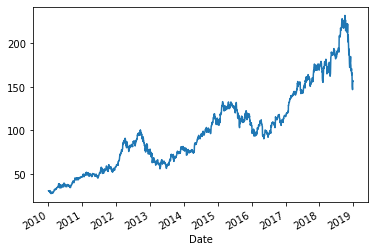

In [23]:
#Apple

aapl = df[df['Name'] == 'AAPL']['Close']
# AAPL = np.log(df[df['Name'] == 'AAPL']['Close'])
aapl.plot()

# big dip in the price over the last period
# is it predictable by arima model?
# model tends to follow patterns. --> No

In [24]:
train = aapl.iloc[:-Ntest]
test = aapl.iloc[-Ntest:]

In [25]:
model = pm.auto_arima(train,
                     error_action='ignore', trace=True,
                     suppress_warnings=True, maxiter=10,
                     seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8570.296, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8575.329, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8574.709, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8574.392, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8577.622, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.650, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8571.332, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8572.500, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8572.527, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8574.574, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8570.852, Time=0.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8570.880, Time=0.60 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8579.289, Time=0.72 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=8572.973, Time=0.29 sec

Best model:  ARIMA(2,1,2)(0,0,0)

In [26]:
model.summary()

# best model found ARIMA(2, 1, 2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4279.148
Date:                Mon, 14 Aug 2023   AIC                           8570.296
Time:                        18:15:17   BIC                           8604.560
Sample:                             0   HQIC                          8582.808
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0803      0.042      1.896      0.058      -0.003       0.163
ar.L1          0.3755      0.165      2.279      0.023       0.053       0.699
ar.L2         -0.4239      0.176     -2.407      0.016      -0.769      -0.079
ma.L1         -0.3433      0.172     -2.002      0.045      -0.679      -0.007
ma.L2          0.3579      0.183      1.958      0.050      -0.000       0.716
sigma2         2.7182      0.039     69.453      0.000       2.642       2.795
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6223.04
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


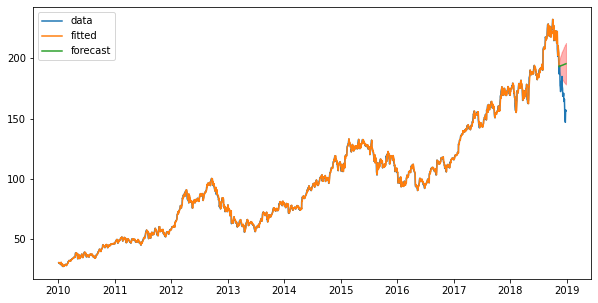

In [28]:
plot_result(model, aapl, train, test)

# true data goes way outside confidence bound
# makes sense with that model, carry on existing trend

C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


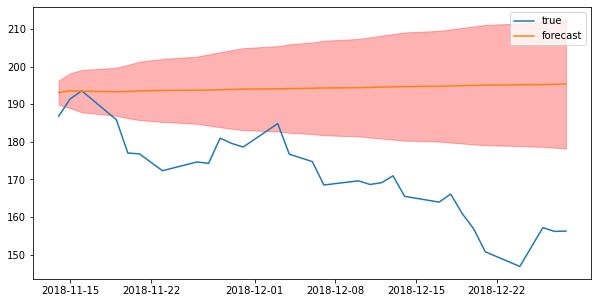

In [29]:
plot_test(model, test)

# prediction pretty far off
# not that bad though, inside confidence bounds

In [30]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test)) # should be 26.0949
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: nan
RMSE Naive: 24.027120586673817


C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

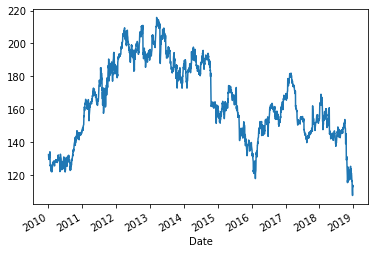

In [32]:
# IBM

ibm = df[df['Name'] == 'IBM']['Close']
# ibm = np.log(df[df['Name'] == 'IBM']['Close'])
ibm.plot()

In [34]:
train = ibm.iloc[:-Ntest]
test = ibm.iloc[-Ntest:]

In [35]:
model = pm.auto_arima(train,
                     error_action='ignore', trace=True,
                     suppress_warnings=True, maxiter=10,
                     seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9442.954, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9436.082, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9437.603, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9437.589, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9434.097, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9439.637, Time=0.42 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.459 seconds


In [37]:
model.summary()

# best model found ARIMA(0, 1, 0) random walk --> ibm stock return = completely unpredictable

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4716.049
Date:                Mon, 14 Aug 2023   AIC                           9434.097
Time:                        18:36:55   BIC                           9439.808
Sample:                             0   HQIC                          9436.183
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.0067      0.055     72.559      0.000       3.898       4.115
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):              5352.76
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.77
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


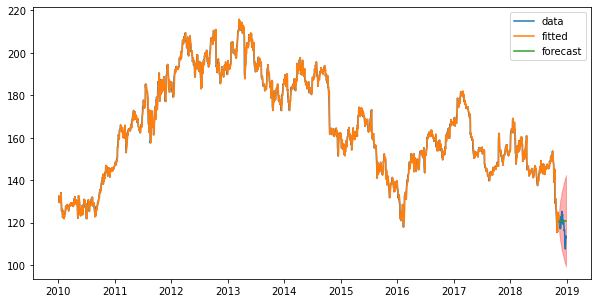

In [38]:
plot_result(model, ibm, train, test)

# nothing out of the ordinary

C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


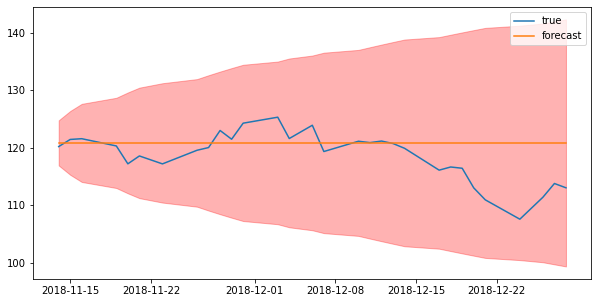

In [39]:
plot_test(model, test)

# prediction not looking that bad
# actual price crosses trough pred line multiple times

In [40]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test)) # should be same as naive
print("RMSE Naive:", rmse(train.iloc[-1], test))

# same

RMSE ARIMA: nan
RMSE Naive: 4.763157130051095


C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

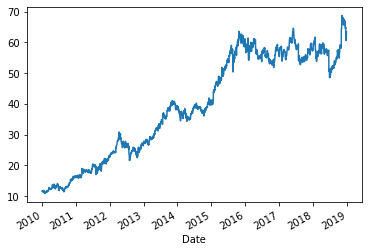

In [41]:
# Starbucks

sbux = df[df['Name'] == 'SBUX']['Close']
# sbux = np.log(df[df['Name'] == 'SBUX']['Close'])
sbux.plot()

In [42]:
train = sbux.iloc[:-Ntest]
test = sbux.iloc[-Ntest:]

In [43]:
model = pm.auto_arima(train,
                     error_action='ignore', trace=True,
                     suppress_warnings=True, maxiter=10,
                     seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3858.919, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3851.895, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3853.862, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3853.860, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3854.154, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3855.861, Time=0.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.666 seconds


In [44]:
model.summary()

# another random walk.. but with drift since model fits with non-zero intercept term

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1923.948
Date:                Mon, 14 Aug 2023   AIC                           3851.895
Time:                        18:42:28   BIC                           3863.317
Sample:                             0   HQIC                          3856.066
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      0.012      2.048      0.041       0.001       0.049
sigma2         0.3283      0.003     94.371      0.000       0.321       0.335
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             18901.16
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               3.80   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


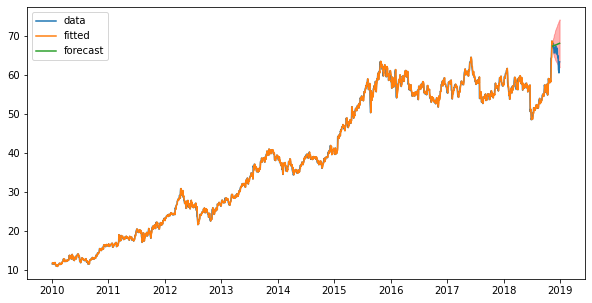

In [45]:
plot_result(model, sbux, train, test)

# a bit hard to see what's going on

C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


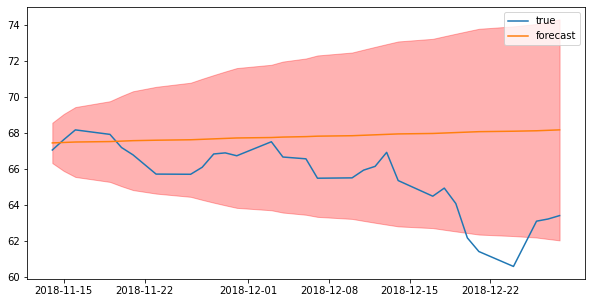

In [46]:
plot_test(model, test)

# not looking too bad at first, then overestimate price when it drops
# don't ignore negative sign of confidence bounds,
# values are perfectly achievable and result in a loss of money

In [47]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test)) # should be 3.0949
print("RMSE Naive:", rmse(train.iloc[-1], test))

# turns out that assuming random walk with 0 drift would have been better
# naive forecast wins again

RMSE ARIMA: nan
RMSE Naive: 2.6889385763409135


C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
